# Import libraries

In [1]:
import os
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy
%matplotlib inline



from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

# dropping car column

In [2]:
df = pd.read_csv("Preprocessed Data.csv")
df.drop('car',axis=1,inplace=True)
df.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_opp,Y,driving_distance
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,1,within 5mins
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,0,within 5mins
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,1,within 15mins


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

# dropping target variable

In [4]:
X=df.drop("Y",axis=1)
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_opp,driving_distance
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,within 5mins
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,within 5mins
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,within 15mins
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,within 15mins
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,1 to 3,4 to 8,1 to 3,1,within 15mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,Low,Evening,Carry out & Take away,24h,Male,26,Single,...,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1 to 3,4 to 8,1 to 3,0,within 5mins
12680,Work,Alone,Rainy,Low,Morning,Carry out & Take away,24h,Male,26,Single,...,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1 to 3,4 to 8,1 to 3,1,within 5mins
12681,Work,Alone,Snowy,Medium,Morning,Coffee House,24h,Male,26,Single,...,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1 to 3,4 to 8,1 to 3,0,within 5mins
12682,Work,Alone,Snowy,Medium,Morning,Bar,24h,Male,26,Single,...,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1 to 3,4 to 8,1 to 3,1,within 25mins


In [5]:
y=df["Y"]
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

In [6]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_opp', 'Y',
       'driving_distance'],
      dtype='object')

# label encoding binary nominal variables

### 1.gender

In [ ]:
le=LabelEncoder()
X["gender"]=le.fit_transform(X["gender"])

In [8]:
X["gender"]

0        0
1        0
2        0
3        0
4        0
        ..
12679    1
12680    1
12681    1
12682    1
12683    1
Name: gender, Length: 12684, dtype: int32

In [9]:
X.dtypes[X.dtypes=="int"].index.values

array(['gender'], dtype=object)

### 2.has_children

In [10]:
X["has_children"]=le.fit_transform(X["has_children"])

In [11]:
X["has_children"]

0        1
1        1
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    0
12683    0
Name: has_children, Length: 12684, dtype: int64

### 3.direction_opp

In [12]:
X["direction_opp"]=le.fit_transform(X["direction_opp"])

In [13]:
X["direction_opp"]

0        1
1        1
2        1
3        1
4        1
        ..
12679    0
12680    1
12681    0
12682    1
12683    0
Name: direction_opp, Length: 12684, dtype: int64

# label encoding of ordinal attributes

In [14]:
# Encoding ordinal attributes
income_order = ['Less than $12500', '$12500 - $24999', 
                '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', 
                '$75000 - $87499', '$87500 - $99999', 
                '$100000 or More']
edu_order = ['Some High School', 'High School Graduate', 
             'Some college - no degree', 'Associates degree', 
             'Bachelors degree', 
             'Graduate degree (Masters or Doctorate)']
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
time_order = ["Morning","Evening","Night"]
expiration_order = ['2h', '24h']
driving_distance_order = ["within 5mins","within 15mins","within 25mins"]

def reorder_encoding(col,order):
    df[col] = df[col].astype("category")
    df[col] = df[col].cat.reorder_categories(new_categories = order,ordered = True)
    return pd.Series(df[col].cat.codes,name=col)

### 1.income

In [15]:
X_income = reorder_encoding("income",income_order)
X_income

0        3
1        3
2        3
3        3
4        3
        ..
12679    6
12680    6
12681    6
12682    6
12683    6
Name: income, Length: 12684, dtype: int8

### 2.eductaion

In [16]:
X_education = reorder_encoding("education",edu_order)
X_education

0        2
1        2
2        2
3        2
4        2
        ..
12679    4
12680    4
12681    4
12682    4
12683    4
Name: education, Length: 12684, dtype: int8

### 3.age

In [17]:
X_age = reorder_encoding("age",age_order)
X_age

0        1
1        1
2        1
3        1
4        1
        ..
12679    2
12680    2
12681    2
12682    2
12683    2
Name: age, Length: 12684, dtype: int8

### 4.age

In [18]:
X_time = reorder_encoding("time",time_order)
X_time

0        1
1        0
2        0
3        1
4        1
        ..
12679    1
12680    0
12681    0
12682    0
12683    0
Name: time, Length: 12684, dtype: int8

### 5.expiration

In [19]:
X_expiration = reorder_encoding("expiration",expiration_order)
X_expiration

0        1
1        0
2        0
3        0
4        1
        ..
12679    1
12680    1
12681    1
12682    1
12683    0
Name: expiration, Length: 12684, dtype: int8

### 6.driving_distance

In [20]:
X_driving_distance = reorder_encoding("driving_distance",driving_distance_order)
X_driving_distance

0        0
1        0
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    2
12683    0
Name: driving_distance, Length: 12684, dtype: int8

### label encoding for 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50'

In [ ]:
frequency_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 
                   'RestaurantLessThan20', 'Restaurant20To50']
freq_order = {
    'never': 0, 
    'Atmost 1': 1,
    '1 to 3': 2, 
    '4 to 8': 3, 
    'Greater than 8': 4
}

for col in frequency_cols:
    X[col] = X[col].map(freq_order)

### one hot encoding for nominal columns

In [22]:
nominal_col = ['destination', 'passanger', 'weather', 'coupon', 
                 'maritalStatus', 'occupation']

In [23]:
X_nominal = pd.get_dummies(X[nominal_col])

### concatenating all the columns

In [24]:
one_hot_df = pd.concat(
    [X_nominal,
    X[frequency_cols],
    X_income,
    X_education,
    X_age,
    X_time,
    X_expiration,
    X_driving_distance,
    X["gender"],
    X["has_children"],
    X["direction_opp"],y],axis=1
)

In [25]:
one_hot_df.shape

(12684, 60)

In [26]:
one_hot_df

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,income,education,age,time,expiration,driving_distance,gender,has_children,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,3,2,1,1,1,0,0,1,1,1
1,0,1,0,0,1,0,0,0,0,1,...,3,2,1,0,0,0,0,1,1,0
2,0,1,0,0,1,0,0,0,0,1,...,3,2,1,0,0,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,1,...,3,2,1,1,0,1,0,1,1,0
4,0,1,0,0,1,0,0,0,0,1,...,3,2,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,6,4,2,1,1,0,1,0,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,6,4,2,0,1,0,1,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,6,4,2,0,1,0,1,0,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,6,4,2,0,1,2,1,0,1,0


In [27]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   destination_Home                                      12684 non-null  uint8
 1   destination_No Urgent Place                           12684 non-null  uint8
 2   destination_Work                                      12684 non-null  uint8
 3   passanger_Alone                                       12684 non-null  uint8
 4   passanger_Friend(s)                                   12684 non-null  uint8
 5   passanger_Kid(s)                                      12684 non-null  uint8
 6   passanger_Partner                                     12684 non-null  uint8
 7   weather_Rainy                                         12684 non-null  uint8
 8   weather_Snowy                                         12684 non-null  uint8


# checking duplicates

In [28]:
one_hot_df[one_hot_df.duplicated()]

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,income,education,age,time,expiration,driving_distance,gender,has_children,direction_opp,Y
32,0,1,0,0,1,0,0,0,0,1,...,5,4,1,1,0,0,1,0,1,0
98,0,1,0,0,1,0,0,0,0,1,...,1,3,1,1,0,0,1,0,1,1
120,0,1,0,0,1,0,0,0,0,1,...,4,4,2,1,0,0,1,0,1,0
164,0,1,0,0,1,0,0,0,0,1,...,3,2,2,1,0,0,1,0,1,0
186,0,1,0,0,1,0,0,0,0,1,...,2,3,2,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,1,0,0,1,0,0,0,0,0,1,...,8,3,4,1,1,0,1,1,1,1
11939,0,1,0,0,0,0,1,0,0,1,...,8,2,3,0,1,0,0,0,1,1
11942,1,0,0,1,0,0,0,0,0,1,...,8,2,3,1,0,1,0,0,0,0
11943,1,0,0,1,0,0,0,0,0,1,...,8,2,3,1,1,0,0,0,1,0


# dropping duplicates

In [29]:
one_hot_df.drop_duplicates(keep="first",inplace=True)

In [30]:
one_hot_df.shape

(12529, 60)

In [31]:
one_hot_df.isnull().sum()

destination_Home                                        0
destination_No Urgent Place                             0
destination_Work                                        0
passanger_Alone                                         0
passanger_Friend(s)                                     0
passanger_Kid(s)                                        0
passanger_Partner                                       0
weather_Rainy                                           0
weather_Snowy                                           0
weather_Sunny                                           0
coupon_Bar                                              0
coupon_Carry out & Take away                            0
coupon_Coffee House                                     0
coupon_Restaurant(20-50)                                0
coupon_Restaurant(<20)                                  0
maritalStatus_Divorced                                  0
maritalStatus_Married partner                           0
maritalStatus_

# Feature Selection

### chi- square method

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import numpy as np

X = one_hot_df.iloc[:,0:-1]
y = one_hot_df.iloc[:,-1]


X = X.astype(int)


chi2_selector = SelectPercentile(chi2)
kBest = chi2_selector.fit_transform(X, y)

chi2_scores = pd.DataFrame(list(zip(X.columns, chi2_selector.scores_)), columns=['feature', 'score'])
print(chi2_scores.sort_values(by="score",ascending=False))


print(X.shape[1])
print(kBest.shape[1])
print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

                                              feature       score
11                       coupon_Carry out & Take away  262.485560
14                             coupon_Restaurant(<20)  220.250253
10                                         coupon_Bar  204.519858
4                                 passanger_Friend(s)  157.295517
46                                        CoffeeHouse  156.289192
1                         destination_No Urgent Place  113.883455
55                                   driving_distance  108.986736
13                           coupon_Restaurant(20-50)   97.442167
54                                         expiration   89.802489
12                                coupon_Coffee House   75.197415
45                                                Bar   73.465308
2                                    destination_Work   61.116083
52                                                age   59.472432
3                                     passanger_Alone   56.385945
7         

In [33]:
X.columns[chi2_selector.get_support()]

Index(['destination_No Urgent Place', 'passanger_Friend(s)', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Restaurant(<20)',
       'CoffeeHouse'],
      dtype='object')

### In feature selection, we aim to select the features which are highly dependent on the response.

### When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 

### In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

# Recurssive Feature Elimination (RFE)

RFE is a wrapper-type feature selection algorithm. Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()

rfe_mod = RFECV(lin_reg,cv=2) 
myvalues=rfe_mod.fit(X,y) 
print(myvalues.support_)
print(myvalues.ranking_)

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))

[ True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[ 1  1  1  1  1  1  1 38 37 39 32 36 34 33 35  5  4  2  3  6 11 28 17 21
 29 19  7 26 20 15  9  8 27 31 22 16 18 24 12 10 30 23 13 14 25 49 42 48
 52 45 53 46 51 44 40 47 43 50 41]
Num Features: 7
Selected Features: [ True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1 38 37 39 32 36 34 33 35  

In [35]:
X.columns[myvalues.get_support()]

Index(['destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner'],
      dtype='object')

# Using Random Forest To select Features

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
print(importances)

[0.01143778 0.01536847 0.01021982 0.01148598 0.01272474 0.0076709
 0.00744681 0.00854041 0.00855078 0.01341441 0.02369709 0.02647598
 0.02310847 0.01371139 0.02303549 0.0049044  0.01526469 0.01531761
 0.01332954 0.00178388 0.00410857 0.00800348 0.0008028  0.00698843
 0.00341838 0.01267889 0.00232357 0.0106856  0.0008703  0.00397885
 0.00411799 0.00398975 0.00283052 0.00437247 0.00366018 0.00944372
 0.00774126 0.00275694 0.00174654 0.00248146 0.00619013 0.01299815
 0.01263234 0.00343179 0.0143088  0.05211128 0.06701794 0.04429742
 0.04357938 0.0427362  0.06773561 0.04822792 0.05818755 0.03596338
 0.03394639 0.03749359 0.02182491 0.01703922 0.01578969]


Text(0, 0.5, 'Mean decrease in impurity')

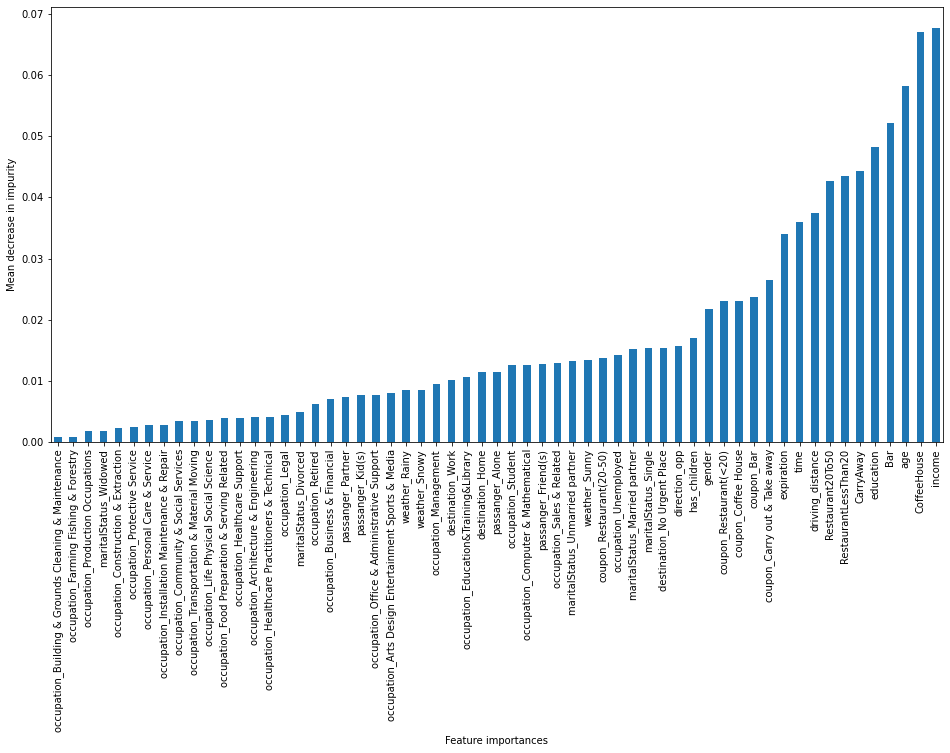

In [37]:
plt.figure(figsize=(16,8))
forest_importances = pd.Series(importances, index=X.columns)

forest_importances.sort_values().plot.bar()
plt.xlabel("Feature importances")
plt.ylabel("Mean decrease in impurity")

In [43]:
one_hot_df.to_csv("Model.csv")